# 第1章 記述統計入門

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
import seaborn as sns
from scipy import stats

## 記述統計
「実際に観察した統計データに対して，そのデータ自体の範囲内での分析を行うこと」を  
**記述統計**といいます。

## 分布
どの値にどれくらいデータが存在するかを表したものを**分布**といいます。  
データの分布は図を使って表すことができます。

### ヒストグラム
1つの連続変数の分布を表す際に使います。  
横軸はデータの区間で区切られているため、各棒の区間には間隔がありません。

**階級**(**bin**)を使ってその区間の**度数**(**frequency**)を表します。  

※**階級**：度数を集計するための区間  
※**度数**：各階級に含まれるデータ数

[こちら](https://bit.ly/3fbMN88)の演習問題をヒストグラム化してみます。

In [ ]:
# あるクラス50人の国語の点数
# DataFrameの作成
data = {
    "point" : [64,73,63,68,44,59,61,42,57,70,
               56,64,53,66,48,48,51,54,54,73,
               51,44,83,74,47,57,41,45,60,72,
               77,69,72,62,78,58,64,61,52,61,
               45,66,58,60,54,71,57,52,54,73]
}

df = pd.DataFrame(data)

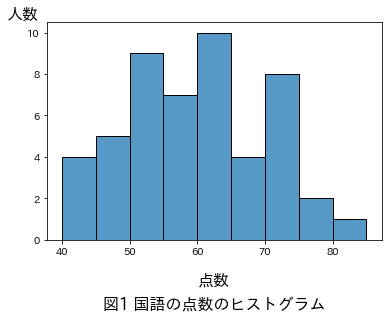

In [ ]:
sns.histplot(df["point"],bins=9, binrange=(40, 85))

plt.xlabel("点数" ,labelpad=16 , fontsize = 16 , x=0.5)
plt.ylabel("人数" ,fontsize=16 , rotation="horizontal" , y=1)
plt.title("図1 国語の点数のヒストグラム" , x=0.5 , y=-0.35 , fontsize = 16)

plt.show()

### 棒グラフ
1つのカテゴリ変数の分布を表す際に使います。  
横軸はカテゴリ変数のとりうる値であるため、各棒の区間には間隔があります。

棒を使ってその区間の度数(frequency)を表します。  

[こちら](https://bit.ly/3sEdZiK)の演習問題を棒グラフ化してみます。

In [ ]:
# 1986年から2015年までのセ・リーグの優勝チームの一覧
# DataFrameの作成
data = {
    "year" : np.arange(1986,2016),
    "WinTeam" : ["広島","巨人","中日","巨人","巨人","広島","ヤクルト","ヤクルト","巨人","ヤクルト",
                 "巨人","ヤクルト","横浜","中日","巨人","ヤクルト","巨人","阪神","中日","阪神",
                 "中日","巨人","巨人","巨人","中日","中日","巨人","巨人","巨人","ヤクルト"]
}

df = pd.DataFrame(data)
df

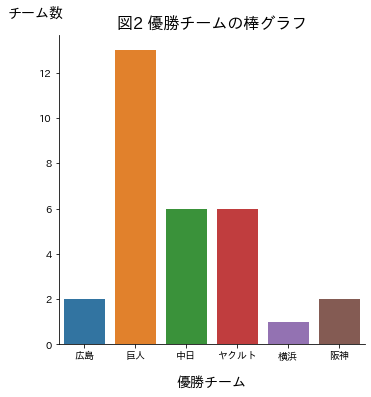

In [ ]:
# 棒グラフ
sns.catplot(x='WinTeam', data=df, kind='count')

plt.xlabel("優勝チーム" ,labelpad=16 , fontsize = 14 , x=0.5)
plt.ylabel("チーム数" ,fontsize=14 , rotation="horizontal" , y=1.05)
plt.title("図2 優勝チームの棒グラフ" , x=0.5 , y=-0.35 , fontsize = 16)    # タイトル移動しないですね…

plt.show()    # 巨人強い！

## 代表値
数値データを端的に表す値のことを**代表値**といいます。  
主に**平均値**、**中央値**、**最頻値（モード）**といいます。

### 平均値(mean)
データの合計をデータの数で割った値を**平均値**（厳密には、**算術平均値**）といいます。  
最も基本的な代表値です。

通常、標本平均を $\bar{x}$ 、母平均を $μ$ で表します。


$$
\bar{x}=\frac{x_1+x_2+…+x_n}{n}=\frac{1}{n}\sum_{i=1}^{n} x_i 
$$

平均値には算術平均のほかにも様々な平均値があります。  
関心のある方は[こちら](https://bit.ly/3sDH9yC)を参照してください。

### 中央値(median)
データを大きさ順に並べた際の真ん中の値を**中央値**といいます。  
平均値に比べて**外れ値の影響を受けにくい**という点が大きな特徴です。

以下の2点に注意しましょう。  
1.   データの数が偶数の場合は、真ん中の2値の平均を取る
2.   平均値の計算より時間がかかる(Python)




### 最頻値(mode)
データの中で最も多く観測される値を**最頻値**といいます。 

極端に特定の値に集中している場合、代表値を最頻値とします。  
最頻値は存在しないことや、複数存在することもあります。

### 演習
[こちら](https://bit.ly/3Wh3pvy)の演習問題の代表値を求めてみましょう。

In [ ]:
# あるクラス50人の国語のテストの結果
# DataFrameの作成
data = {
    "point" : [64,73,63,68,44,59,61,42,57,70,
               56,64,53,66,48,48,51,54,54,73,
               51,44,83,74,47,57,41,45,60,72,
               77,69,72,62,78,58,64,61,52,61,
               45,66,58,60,54,71,57,52,54,73]
}

df = pd.DataFrame(data)

In [ ]:
# 平均値の導出
print(np.mean(df["point"]))
print(df["point"].mean())

59.72
59.72


In [ ]:
# 中央値の導出
print(np.median(df["point"]))
print(df["point"].median())

59.5
59.5


In [ ]:
# 最頻値の導出
mode, count = stats.mode(df["point"])    # 最頻値 , カウント数
print(mode)
print(count)

[54]
[4]


## 散布度
各データの値に差が大きい場合は、全体の性質を説明するために「データの散らばり」を指票とする必要があります。

この「データの散らばり具合」を**散布度**といいます。  


以下に紹介する**分散**や**標準偏差**のほか、**範囲**や**四分位数**といったものもあります。  
（四分位数は**箱ひげ図**によって図示します。[こちら](https://bit.ly/3DnXRah)を参考にしてください。）

### 分散
平均からの偏差の2乗の平均を**分散**といいます。  
通常標本の分散は $s^2$、母集団の分散は$\sigma^2$で表します。

$$    
s^2=\frac{1}{n}\Bigl(\bigl(x_1-\bar{x}\bigr)^2+\bigl(x_2-\bar{x}\bigr)^2+…+\bigl(x_n-\bar{x}\bigr)^2\Bigr)=\frac{1}{n}\sum_{i=1}^{n}\bigl (x_i-\bar{x}\bigr)^2
$$

### 標準偏差
尺度を合わせるために、分散の平方根を取ったものを**標準偏差**といいます。  
通常標本の分散は$s$、母集団の標準偏差は$\sigma$で表します。

$$
s=\sqrt{\frac{1}{n}\sum_{i=1}^{n}\bigl (x_i-\bar{x}\bigr)^2}
$$

平均±標準偏差の間にどのくらいのデータが入っているのか、感覚値として覚えておくとイメージがつきやすいでしょう。



| |  |
| ---- | --- | 
|  $\mu$±$\sigma$ | 約$\frac{2}{3}$% | 
| $\mu$±2$\sigma$ | 約$95$% | 
| $\mu$±3$\sigma$ | 約$99$% | 

### 演習
[こちら](https://bit.ly/3gUB7Hh)の演習問題の分散と標準偏差を求めてみましょう。

In [ ]:
# Seriesの作成
pd = pd.Series([14,2,13,20,16])
pd

0    14
1     2
2    13
3    20
4    16
dtype: int64

In [ ]:
# 分散の導出
np.var(pd)

36.0

In [ ]:
# 標準偏差の導出
np.std(pd)

6.0

データの変化による平均値・分散の変化については[こちら](https://bit.ly/3flfAHm)が大変分かりやすいと思います。

第1章は終了です。お疲れさまでしたー